In [42]:
from google.colab import files
files.upload()

Saving dataset3.csv to dataset3.csv


{'dataset3.csv': b'Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0,64.5,4.92,0.24\r\n3M India Ltd.,1405.1,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0,12.95,29.25,3.61\r\nAavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.6,0.02,0,-0.64,0,-160.45,0,#N/A,0,0\r\nABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0,120,184.71,0.65,34.43,13.15,41.88,2.25\r\nAbbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0,24.07,120.39,0.2,30,21.68,17.6,2.5\r\nAccelya Solutions India Ltd.,437.52,114.21,65.54,102.75,147.45,4.88,0.02,88.43,81.57,1.08,86,18.34,2.56,0.84\r\nAegis Logistics Ltd.,4463.83,4.5,1,15.71,11.84,5.09,14.47,-147.17,19.68,-7.48,33.94,20.7,14.44,0.26\r\nAGC Networks Ltd.,994.6,22.65,12.73,43.4,53.11,2.92,0.8,-46.2,63.5,-0.73,33.54,20.56,3.44,0.3\r\nAgro Tech Food

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
data = pd.read_csv('dataset3.csv')

In [51]:
data.head(20)

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.50,4.92,0.24
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.95,29.25,3.61
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,NaN,0.00,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.15,41.88,2.25
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.68,17.60,2.50
5,Accelya Solutions India Ltd.,437.52,114.21,65.54,102.75,147.45,4.88,0.02,88.43,81.57,1.08,86.00,18.34,2.56,0.84
6,Aegis Logistics Ltd.,4463.83,4.50,1.00,15.71,11.84,5.09,14.47,-147.17,19.68,-7.48,33.94,20.70,14.44,0.26
7,AGC Networks Ltd.,994.60,22.65,12.73,43.40,53.11,2.92,0.80,-46.20,63.50,-0.73,33.54,20.56,3.44,0.30
8,Agro Tech Foods Ltd.,704.54,16.07,10.29,37.54,52.74,5.19,0.00,27.70,36.28,0.76,11.76,21.45,26.44,1.33
9,Akzo Nobel India Ltd.,1987.80,26.54,18.67,32.05,39.58,2.31,0.00,137.10,201.80,0.68,36.47,17.77,15.54,3.53


In [46]:
test = data.iloc[:,:]

In [47]:
data = data.replace( ' -   ', np.nan)

In [48]:
data.dtypes

Company Name                     object
Net Sales                       float64
PBIDTM (%)                      float64
PATM (%)                        float64
ROE (%)                         float64
ROCE (%)                        float64
Asset Turnover(x)               float64
Total Debt/Equity(x)            float64
Cons OCF                        float64
Cons PAT                        float64
OCF/PAT                         float64
FR_Dividend Pay Out Ratio(%)    float64
Free Float                      float64
Ev/EBITDA                       float64
M/Sales                         float64
dtype: object

In [49]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [52]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [53]:
data.fillna(data.mean(), inplace=True)

In [54]:
len(data.columns)

15

# **Ev/EBITDA Prediction**

In [55]:
data1 = data.iloc[:,:-1 ]

In [57]:
data1.tail()


,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA
155,Whirlpool Of India Ltd.,2657.94,14.58,7.66,59.59,83.98,5.16,0.00,216.99,123.73,1.75,0.00,19.950000,9.98
156,Wintac Ltd.,24.27,-0.81,-41.52,-54.28,-9.85,1.01,1.80,3.85,-5.38,-0.72,0.00,27.040000,13.73
157,Wyeth Ltd.- (Amalgamated),588.53,69.95,47.80,66.78,94.47,2.13,0.01,76.44,144.69,0.53,28.26,30.780000,9.98
158,Xchanging Solutions Ltd.,551.81,11.63,194.77,0.00,481.50,2.21,0.01,-104.62,537.37,-0.19,0.00,6.090000,8.43
159,Zim Laboratories Ltd.,182.66,35.86,17.60,80.76,63.43,2.71,2.45,23.49,16.45,1.43,3.65,22.129929,0.00


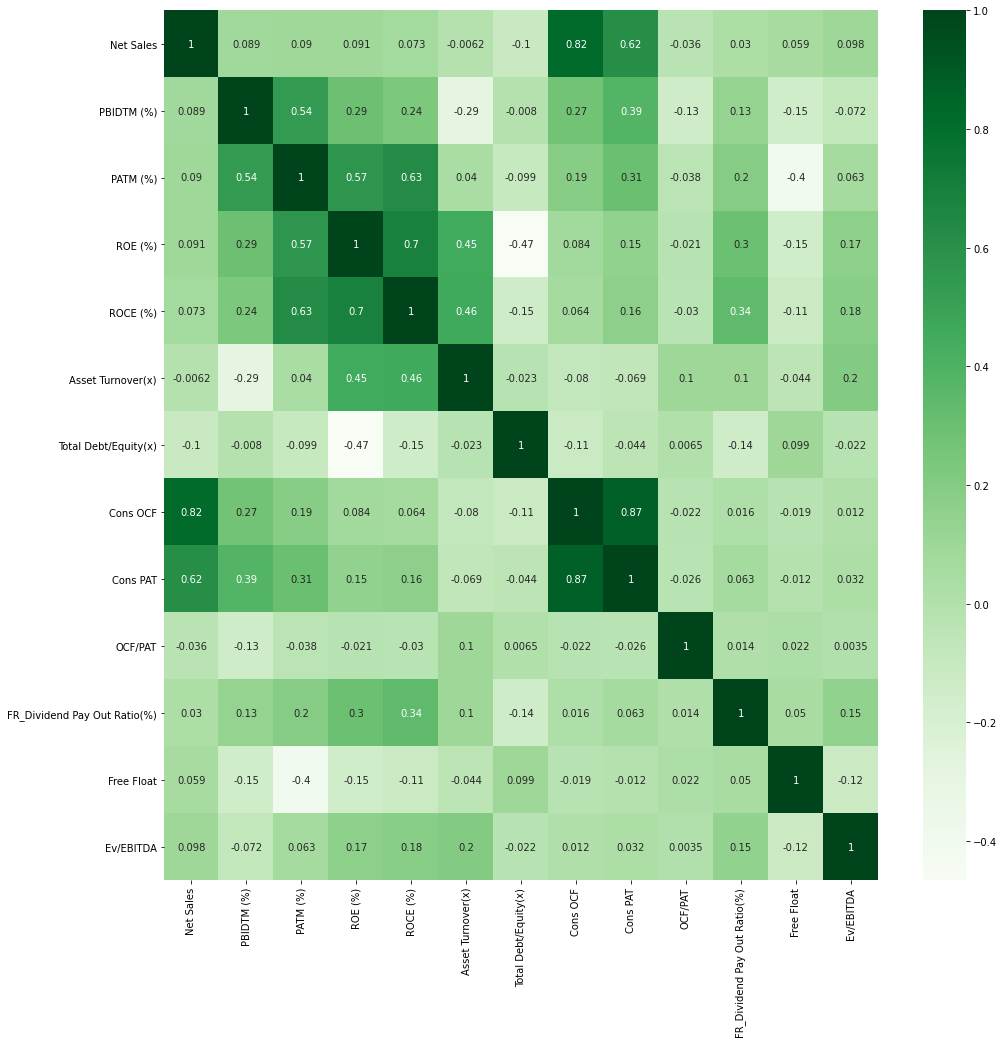

In [58]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [59]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.1]
relevant_features.index

Index(['ROE (%)', 'ROCE (%)', 'Asset Turnover(x)',
       'FR_Dividend Pay Out Ratio(%)', 'Free Float', 'Ev/EBITDA'],
      dtype='object')

In [60]:
X,y = data1[['ROE (%)', 'ROCE (%)', 'Asset Turnover(x)',
       'FR_Dividend Pay Out Ratio(%)', 'Free Float']], data1['Ev/EBITDA']

In [61]:
X

,ROE (%),ROCE (%),Asset Turnover(x),FR_Dividend Pay Out Ratio(%),Free Float
0,-70.15,-1.18,0.83,0.00,64.500000
1,22.66,32.52,3.54,0.00,12.950000
2,0.03,0.60,0.02,0.00,22.129929
3,14.58,24.79,2.37,34.43,13.150000
4,56.69,84.84,3.22,30.00,21.680000
...,...,...,...,...,...
155,59.59,83.98,5.16,0.00,19.950000
156,-54.28,-9.85,1.01,0.00,27.040000
157,66.78,94.47,2.13,28.26,30.780000
158,0.00,481.50,2.21,0.00,6.090000


In [ ]:
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


sc_X = StandardScaler()
X = sc_X.fit_transform(X)
mm_X = MinMaxScaler()
X = mm_X.fit_transform(X)
rs_X = RobustScaler()
X = rs_X.fit_transform(X)
'''

'\nmm_X = MinMaxScaler()\nX = mm_X.fit_transform(X)\nrs_X = RobustScaler()\nX = rs_X.fit_transform(X)\n'

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [63]:
X_train

,ROE (%),ROCE (%),Asset Turnover(x),FR_Dividend Pay Out Ratio(%),Free Float
60,18.15,27.30,2.96,41.19,22.830000
115,-193.71,-42.85,4.70,0.00,18.150000
2,0.03,0.60,0.02,0.00,22.129929
123,51.44,53.68,5.96,0.00,22.129929
45,28.27,41.15,2.77,14.42,10.150000
...,...,...,...,...,...
71,176.38,225.94,4.59,58.09,40.620000
106,180.63,179.73,4.42,48.63,30.170000
14,7.14,9.17,0.21,18.41,19.140000
92,-0.20,11.36,3.55,0.00,29.320000


In [64]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [65]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 38.7369570313
 1 XGBRegressor            84.0348992040
 2 RidgeCV                 30.3528794137
 3 BayesianRidge           34.3719105083
 4 ARDRegression           35.3496384152
 5 ElasticNetCV            38.7369570313
 6 LassoLarsCV             38.7369570313
 7 SVR                     33.4761628120


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [67]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 -0.09124
 1 XGBRegressor            -1.36731
 2 RidgeCV                 0.14494
 3 BayesianRidge           0.03172
 4 ARDRegression           0.00418
 5 ElasticNetCV            -0.09124
 6 LassoLarsCV             -0.09124
 7 SVR                     0.05696


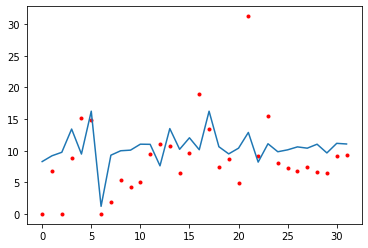

In [68]:
#plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[2]))], pred_list[2])


# **M/Sales Prediction**

In [69]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [70]:
data2.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,M/Sales
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.500000,0.24
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.950000,3.61
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,22.129929,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.150000,2.25
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.680000,2.50


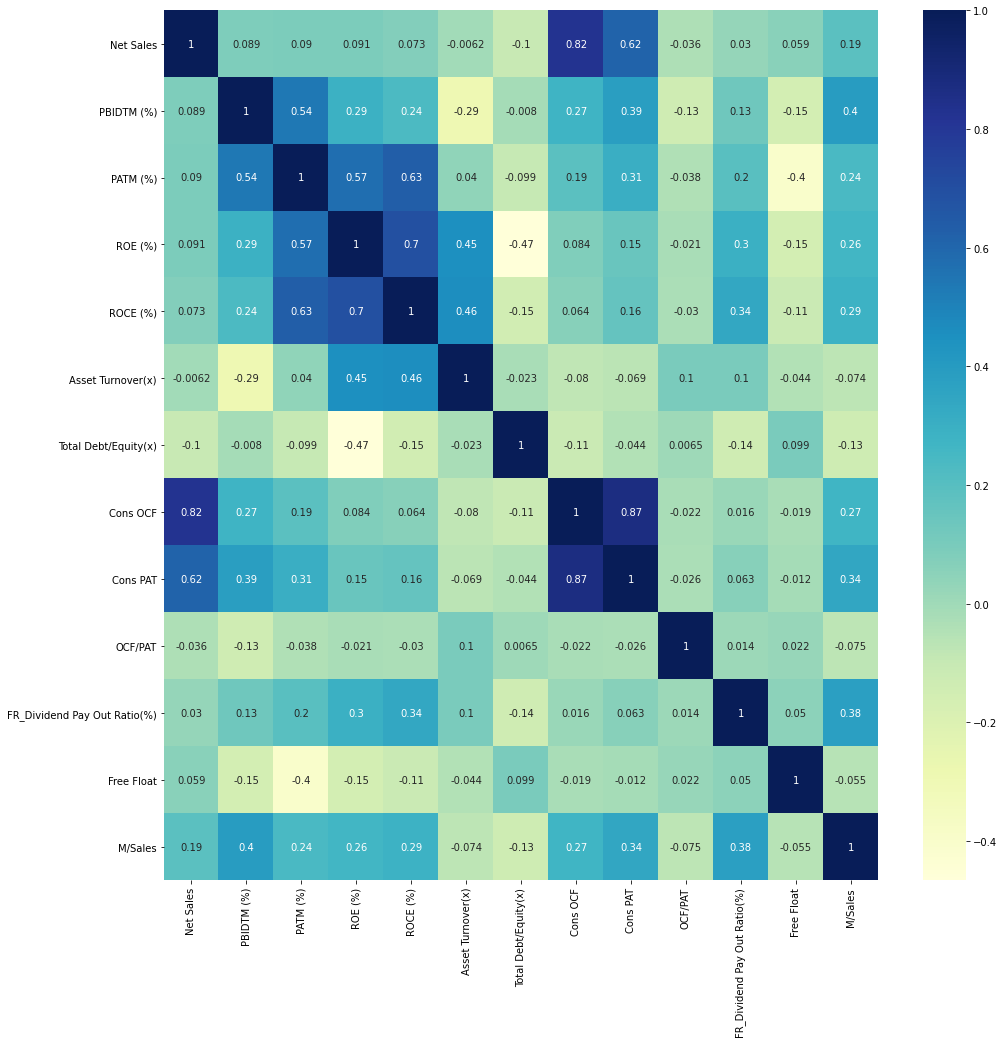

In [72]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [80]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>=0.265]
relevant_features.index

Index(['PBIDTM (%)', 'ROCE (%)', 'Cons OCF', 'Cons PAT',
       'FR_Dividend Pay Out Ratio(%)', 'M/Sales'],
      dtype='object')

In [81]:
X,y = data2[['PBIDTM (%)', 'ROCE (%)', 'Cons OCF', 'Cons PAT',
       'FR_Dividend Pay Out Ratio(%)']], data2['M/Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
'''
mm_X = MinMaxScaler()
X = mm_X.fit_transform(X)


rs_X = RobustScaler()
X = rs_X.fit_transform(X)
'''

'\nmm_X = MinMaxScaler()\nX = mm_X.fit_transform(X)\n\n\nrs_X = RobustScaler()\nX = rs_X.fit_transform(X)\n'

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [84]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [85]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 1.34538
 1 XGBRegressor            1.62417
 2 RidgeCV                 1.36187
 3 BayesianRidge           1.32032
 4 ARDRegression           1.34499
 5 ElasticNetCV            1.34515
 6 LassoLarsCV             1.32828
 7 SVR                     1.38316


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [86]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.03001
 1 XGBRegressor            -0.41364
 2 RidgeCV                 0.00609
 3 BayesianRidge           0.06581
 4 ARDRegression           0.03058
 5 ElasticNetCV            0.03034
 6 LassoLarsCV             0.05452
 7 SVR                     -0.02523


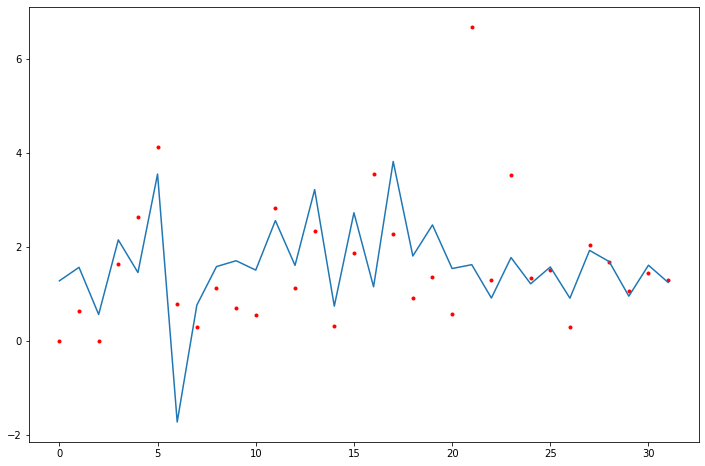

In [94]:
plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[1]))], pred_list[3])
